In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import shap
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


PATH_PROJECT = "/home/yoshraf/projects/mestrado/"

X_train = pd.read_parquet(f"{PATH_PROJECT}data/counting_trips/X_train.parquet")
X_test = pd.read_parquet(f"{PATH_PROJECT}data/counting_trips/X_test.parquet")
y_train = pd.read_parquet(f"{PATH_PROJECT}data/counting_trips/y_train.parquet")
y_test = pd.read_parquet(f"{PATH_PROJECT}data/counting_trips/y_test.parquet")

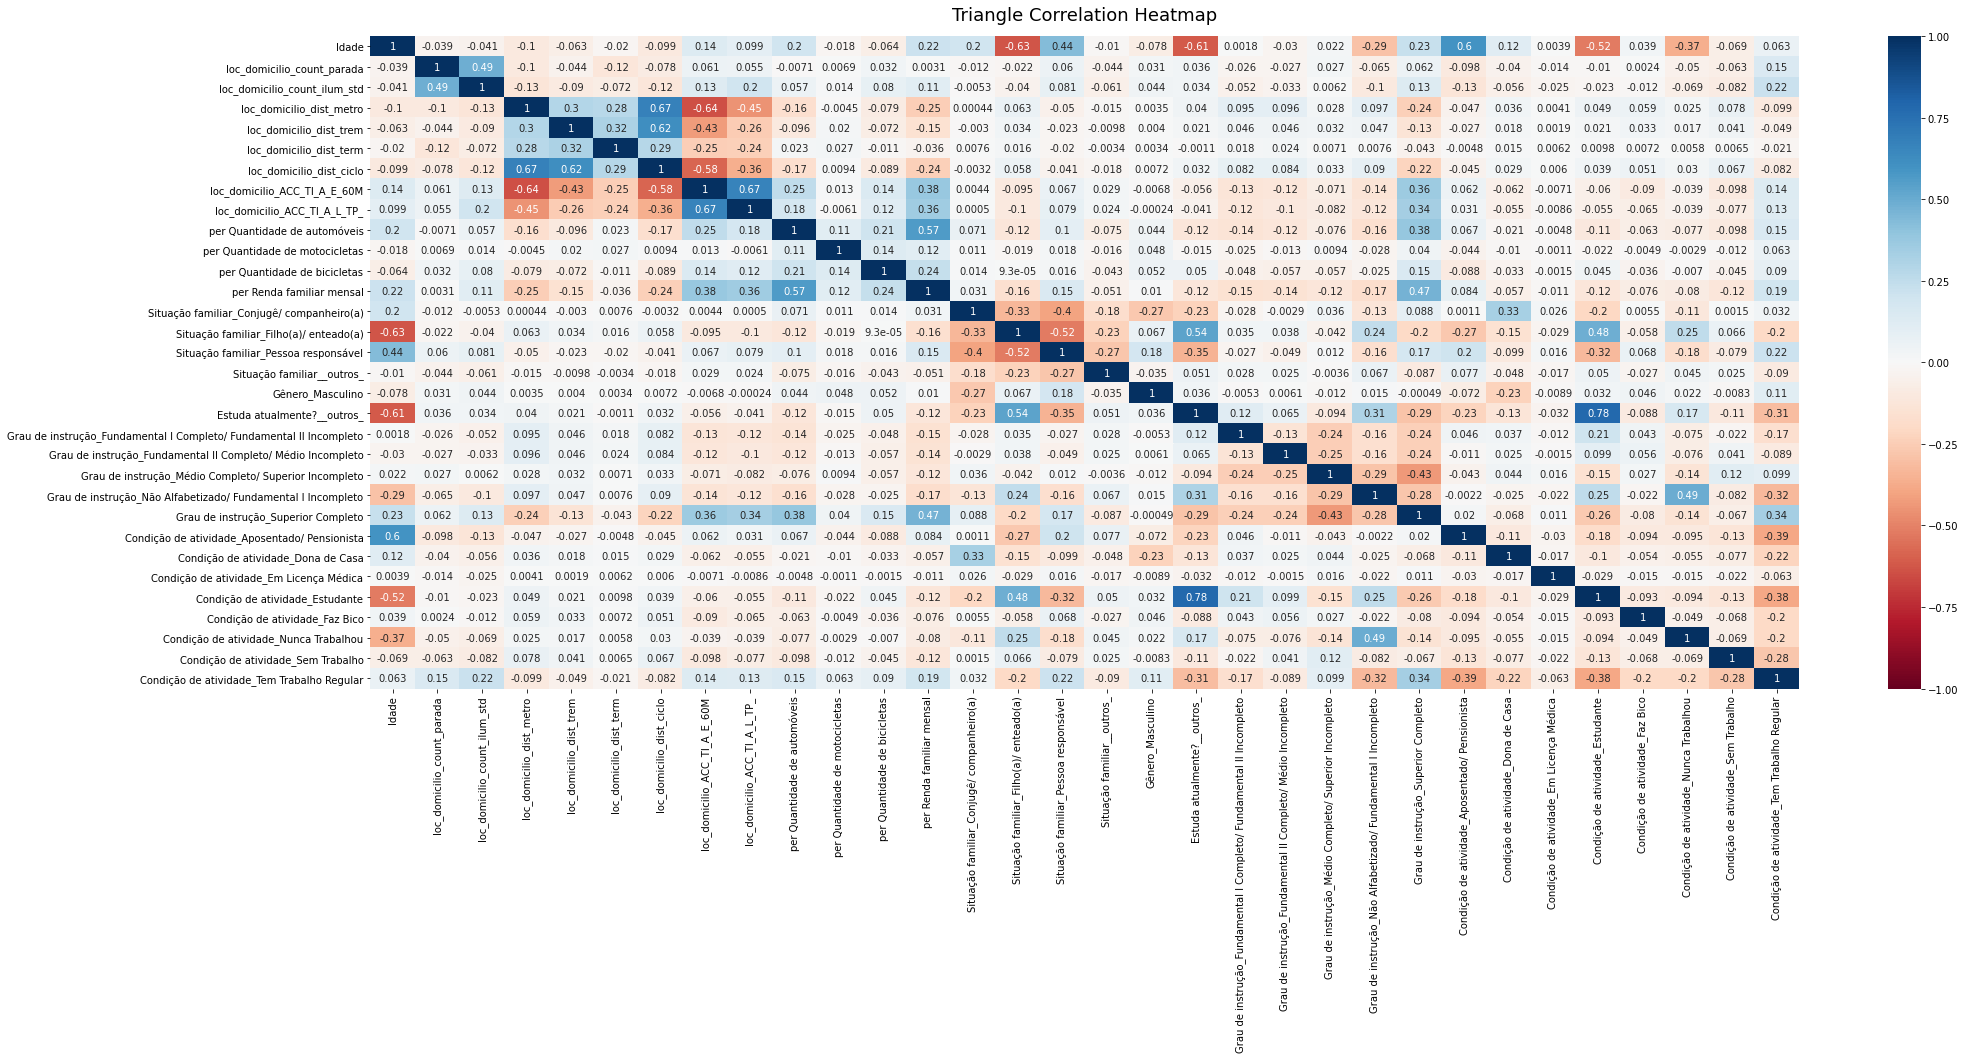

In [2]:
f = 2
plt.figure(figsize=(16*f, 6*f))
# define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(X_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

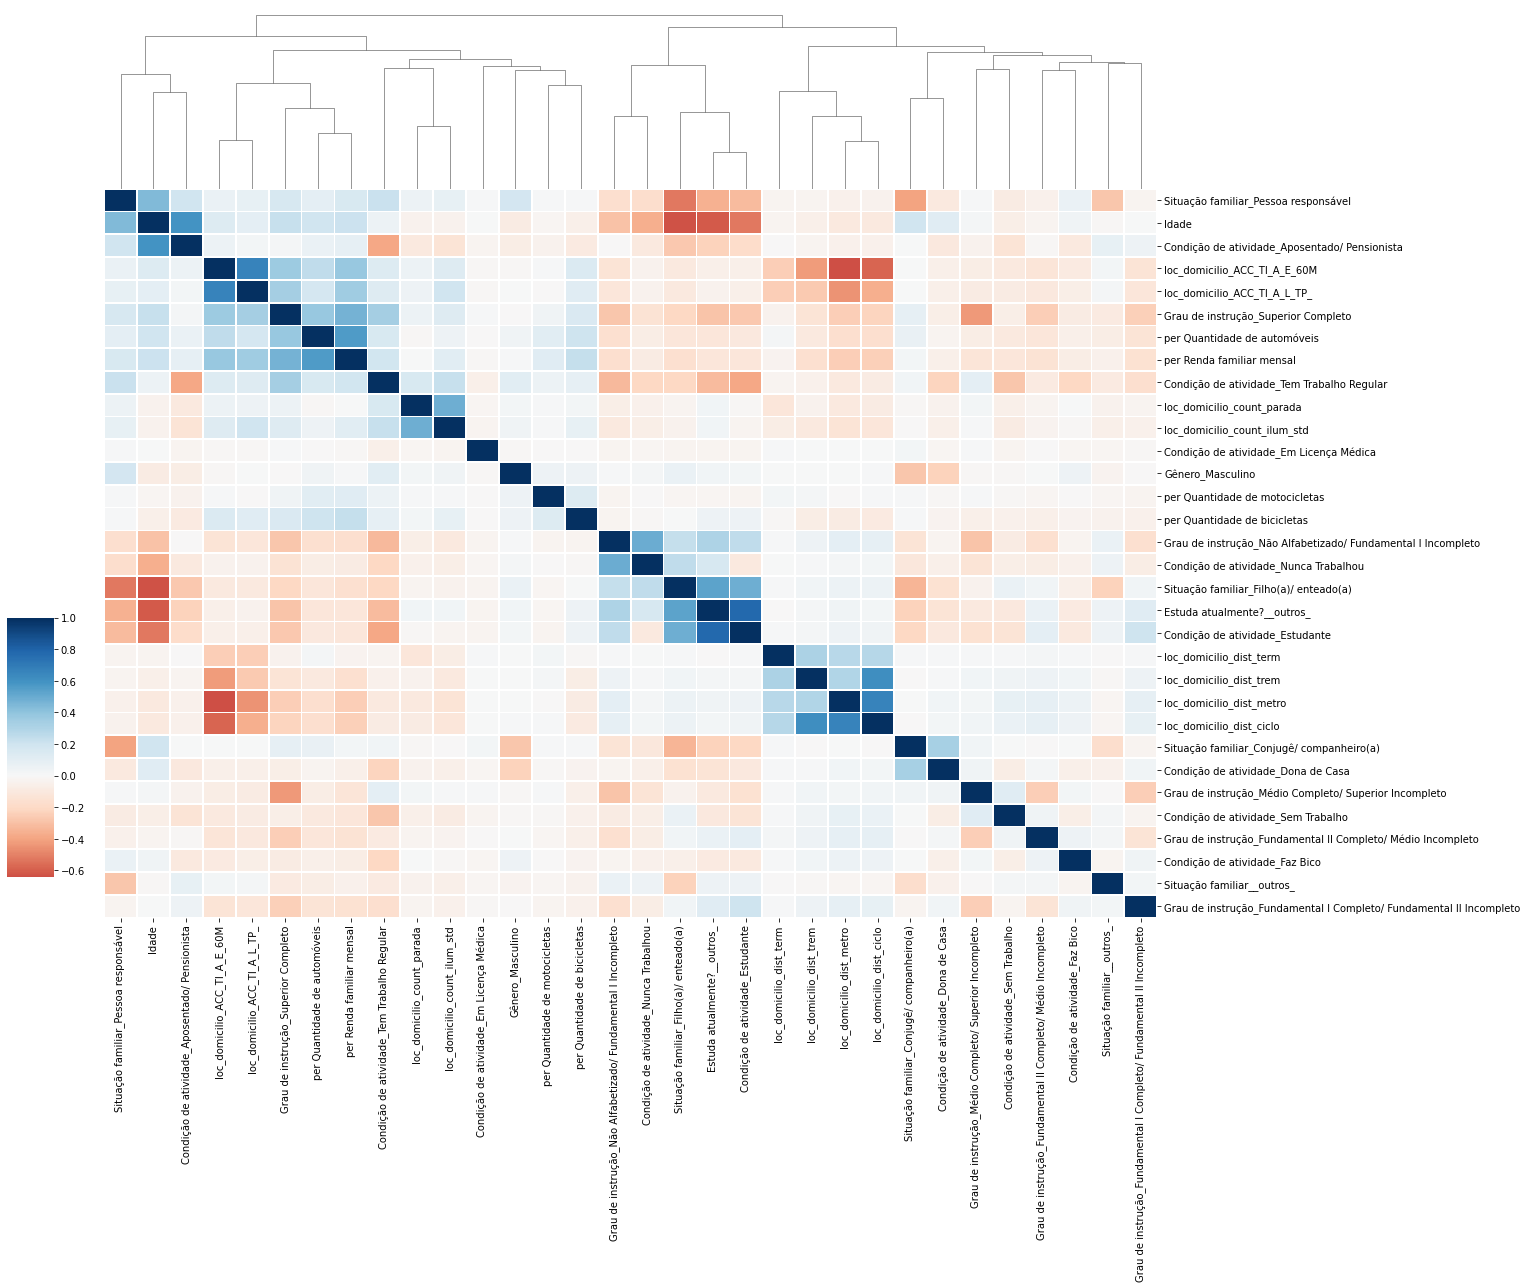

In [4]:
f = 1.2
# Draw the full plot
g = sns.clustermap(X_train.corr(), center=0, cmap="RdBu",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(18*f, 15*f))

g.ax_row_dendrogram.remove()

In [17]:
X_train["loc_domicilio_count_ilum_std"]

Identifica pessoa  Zona de domicílio  Data da entrevista  Coordenada X domicílio  Coordenada Y domicílio
00660499102        66.0               29052018            330493.0                7387691.0                 12
02681524101        268.0              01072018            328475.0                7386559.0                 20
00630610101        63.0               07082018            330746.0                7389618.0                  6
02690056103        269.0              15042018            329857.0                7386403.0                  4
00960607101        96.0               18052018            325032.0                7394375.0                 24
                                                                                                            ..
03230574103        323.0              18082018            321031.0                7384926.0                 48
02350036101        235.0              09082017            349546.0                7387116.0                 22
0008059

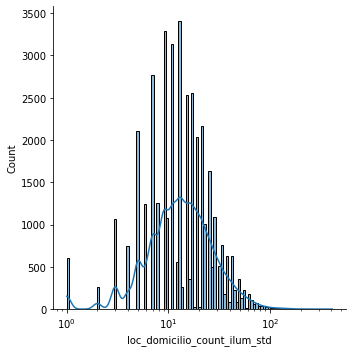

In [29]:
# fig, ax = plt.subplots(1, figsize=(10,10))
var = X_train["loc_domicilio_count_ilum_std"]
sns.displot(var +1, kde=True, log_scale=True)
# sns.displot(var +1, kde=True, log_scale=False)

In [32]:
X_train.columns

Index(['Pontos Critério Brasil', 'Idade', 'loc_domicilio_count_parada',
       'loc_domicilio_count_ilum_led', 'loc_domicilio_count_ilum_std',
       'loc_domicilio_dist_metro', 'loc_domicilio_dist_trem',
       'loc_domicilio_dist_term', 'loc_domicilio_dist_ciclo',
       'loc_domicilio_ACC_TI_A_E_60M', 'loc_domicilio_ACC_TP_A_E_60M',
       'loc_domicilio_ACC_TI_A_L_TI_', 'loc_domicilio_ACC_TI_A_L_TP_',
       'per Quantidade de automóveis', 'per Quantidade de motocicletas',
       'per Quantidade de bicicletas', 'per Renda familiar mensal',
       'Condição de moradia_Alugada', 'Condição de moradia_Própria',
       'Condição de moradia__outros_',
       'Situação familiar_Conjugê/ companheiro(a)',
       'Situação familiar_Filho(a)/ enteado(a)',
       'Situação familiar_Pessoa responsável', 'Situação familiar__outros_',
       'Gênero_Masculino', 'Estuda atualmente?__outros_',
       'Grau de instrução_Fundamental I Completo/ Fundamental II Incompleto',
       'Grau de instrução_Fu

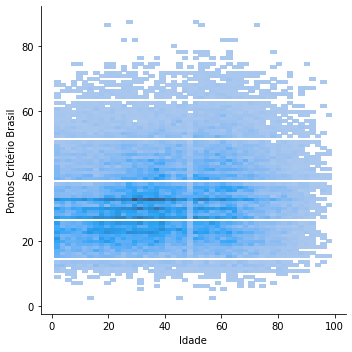

In [35]:
sns.displot(X_train, x="Idade", y="Pontos Critério Brasil")

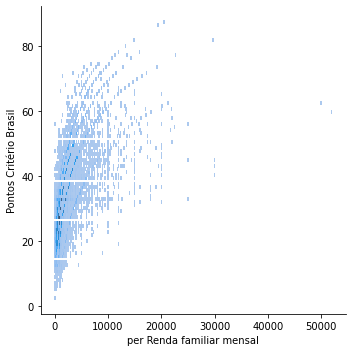

In [39]:
sns.displot(X_train, x="per Renda familiar mensal", y="Pontos Critério Brasil")

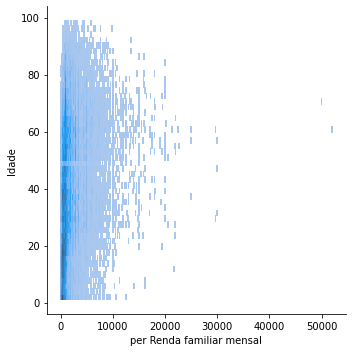

In [37]:
sns.displot(X_train, x="per Renda familiar mensal", y="Idade")